In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import itertools
import sys
sys.path.insert(0, '..')
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 9)
plt.rcParams['font.size'] = 16
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

import covid19

In [3]:
data_world_path = 'time_series_19-covid-Deaths.csv'
data_world_path = covid19.data.download('deaths', repo='world')
cases_world_path = covid19.data.download('cases', repo='world')
cases_world_path

'time_series_covid19_confirmed_global.csv'

In [4]:
world_cases = covid19.data.reformat(cases_world_path)
world_data = covid19.data.reformat(data_world_path)
world_cases, world_data

(                         location                country  deaths
 date                                                            
 2020-02-24            Afghanistan            Afghanistan       1
 2020-02-25            Afghanistan            Afghanistan       1
 2020-02-26            Afghanistan            Afghanistan       1
 2020-02-27            Afghanistan            Afghanistan       1
 2020-02-28            Afghanistan            Afghanistan       1
 ...                           ...                    ...     ...
 2020-04-05         Western Sahara         Western Sahara       4
 2020-04-06         Western Sahara         Western Sahara       4
 2020-04-07         Western Sahara         Western Sahara       4
 2020-04-06  Sao Tome and Principe  Sao Tome and Principe       4
 2020-04-07  Sao Tome and Principe  Sao Tome and Principe       4
 
 [10212 rows x 3 columns],
                location      country  deaths
 date                                        
 2020-03-22  Afghanis

In [5]:
print(sorted(world_data['country'].unique()))

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Cabo Verde', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, South', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Libya', 'Liechtenst

In [6]:
DAY = np.timedelta64(24 * 60 * 60, 's')
PALETTE_ONE = list(sns.color_palette())

SHOWUNTIL = np.datetime64(world_data.index.max(), 's') + 10 * DAY

EXTENT = ('2020-02-20', SHOWUNTIL)
XLIM = tuple(map(np.datetime64, EXTENT))

In [7]:
PARAMS = {
    'Iran': -2,
    'Italy': 0,
    'Spain': 8,
    'France': 11,
    'US': 13,
    'United Kingdom': 15,
    'Netherlands': 16,
    'Germany': 18,
    'Switzerland': 18,
    'Belgium': 20,
    'Sweden': 23,
    'Austria': 24,
}

In [8]:
country_data = {}
for country in PARAMS:
    country_data[country] = world_data[world_data['location'] == country]

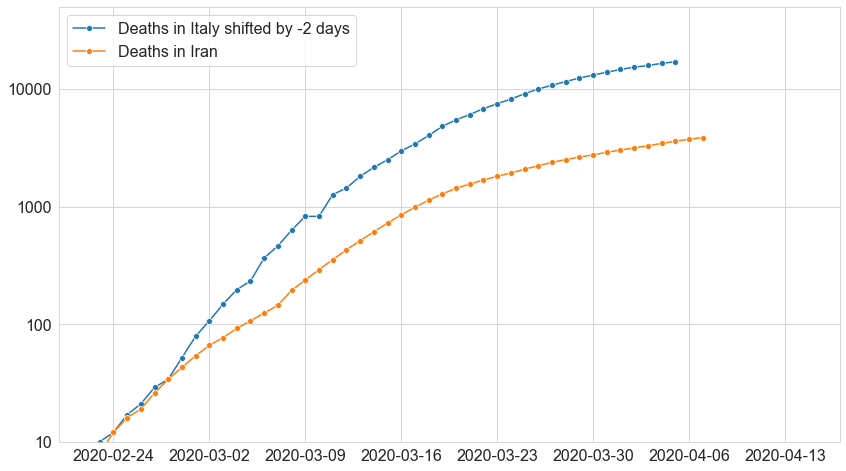

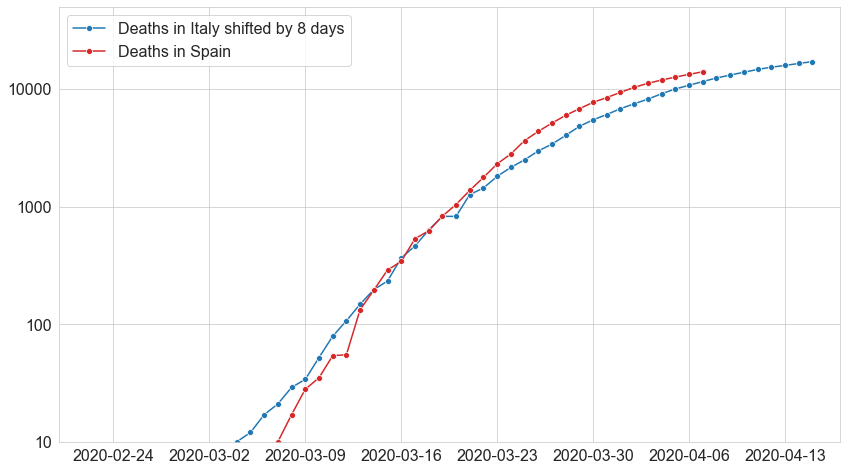

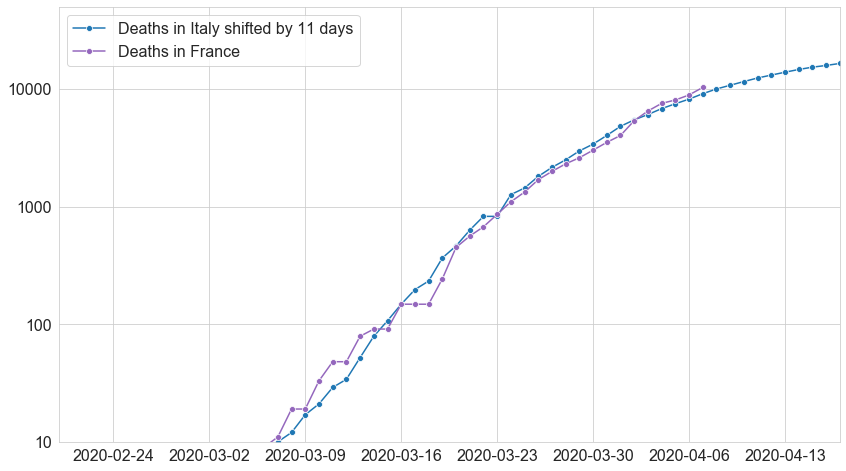

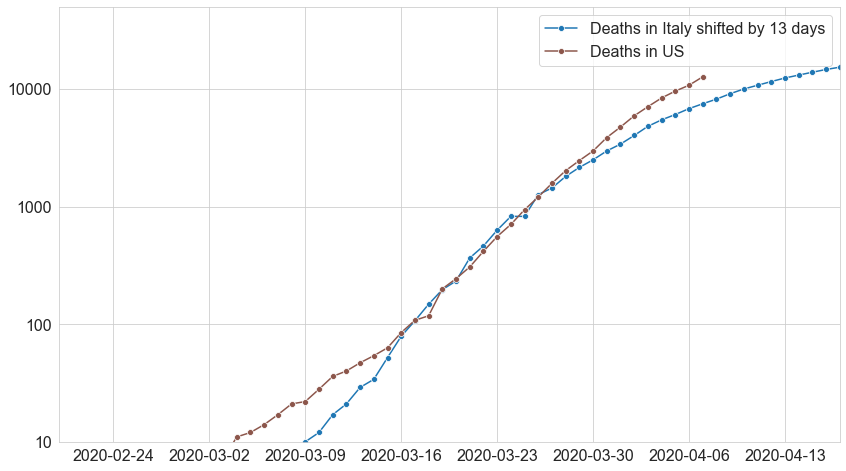

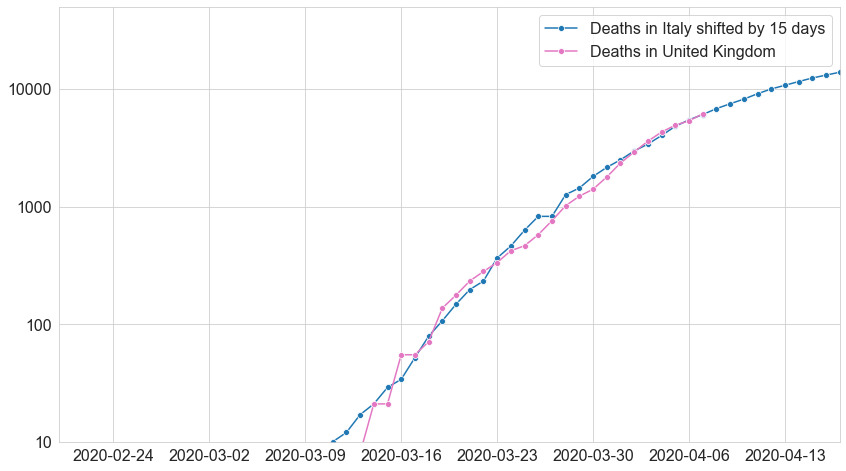

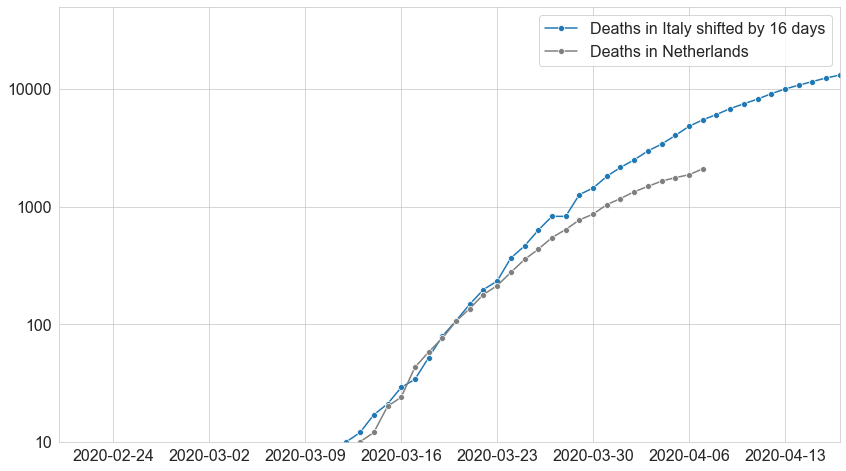

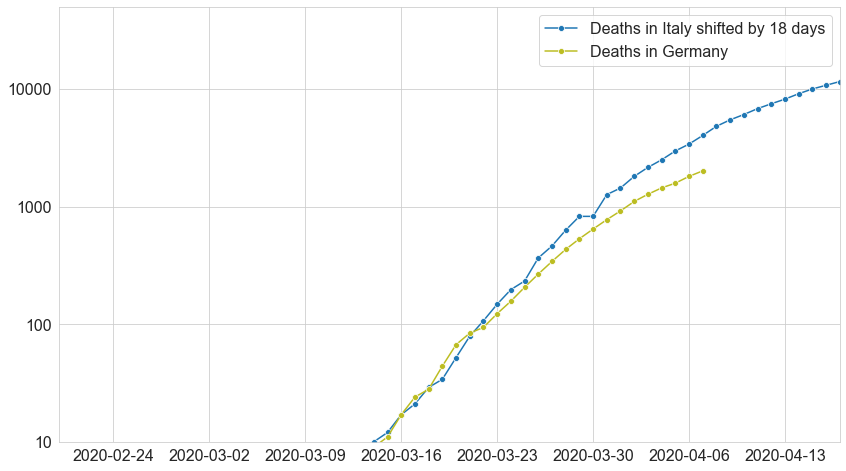

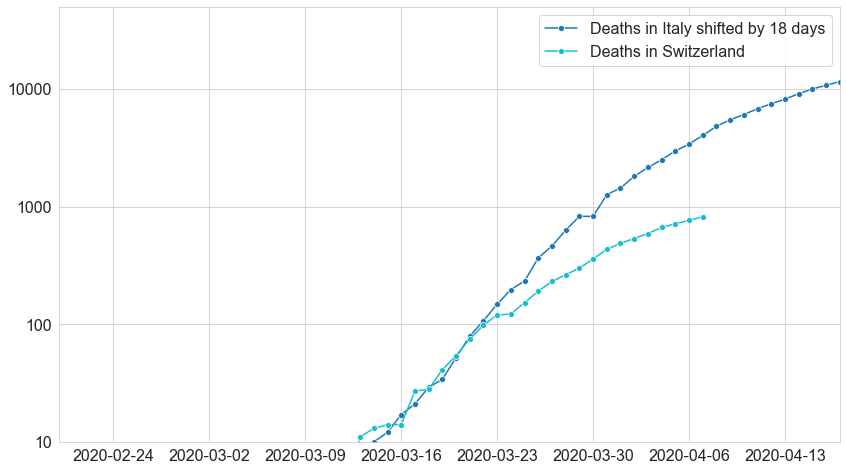

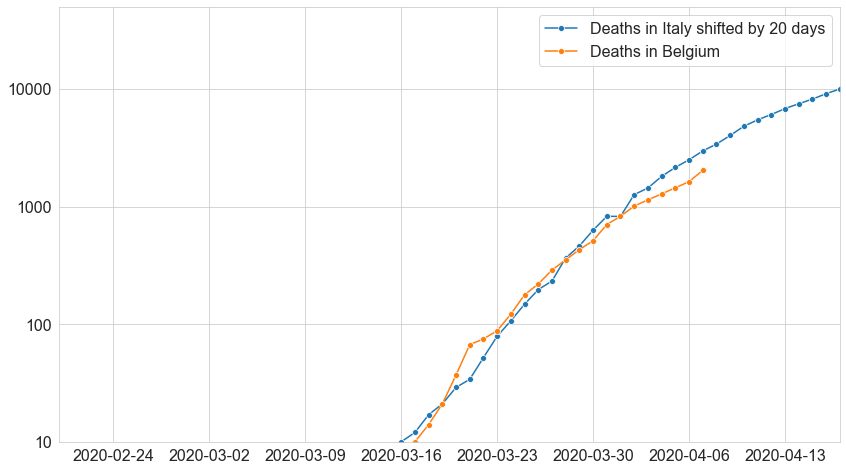

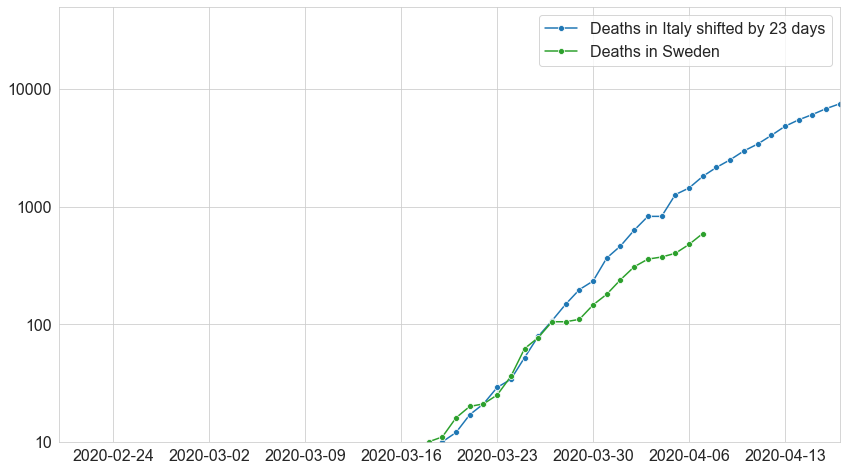

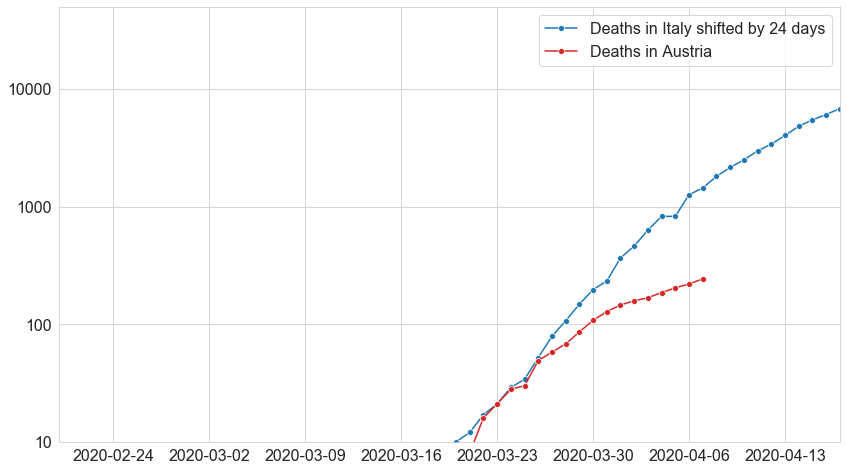

In [9]:
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:])):
    if country == 'Italy':
        continue
    _, ax = plt.subplots(subplot_kw={
        'yscale': 'log',
        'ylim': (10, 50000),
        # 'ylim': (0, country_data[country]['deaths'].max() * 1.1),
        'xlim': XLIM
    }, figsize=(14, 8))
    covid19.plot.plot_data(ax, country_data['Italy']['deaths'], label=f'Deaths in Italy shifted by {delay} days', delay=-delay, color=PALETTE_ONE[0], kind='line', marker='o')
    covid19.plot.plot_data(ax, country_data[country]['deaths'], label=f'Deaths in {country}', color=color, kind='line', marker='o')


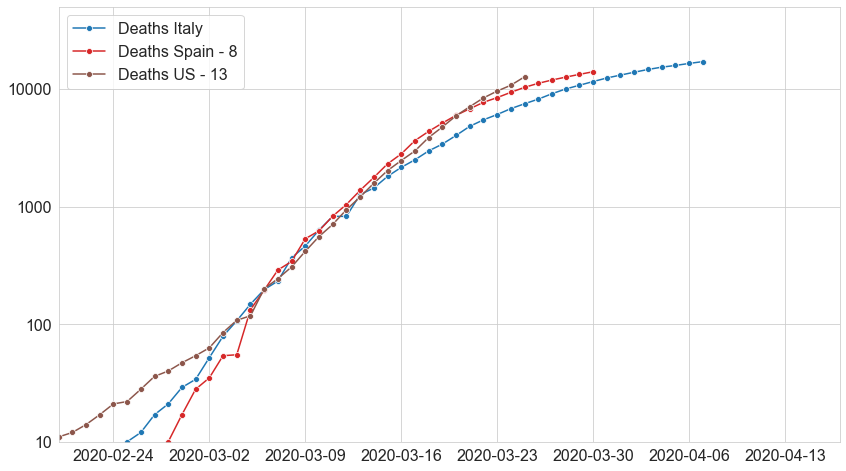

In [10]:
_, ax = plt.subplots(subplot_kw={'yscale': 'log', 'ylim': (10, 50000), 'xlim': XLIM}, figsize=(14, 8))
covid19.plot.plot_data(ax, country_data['Italy']['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0], kind='line', marker='o')
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:])):
    if country not in ['Spain', 'US']:
        continue
    covid19.plot.plot_data(ax, country_data[country]['deaths'], label=f'Deaths {country} - {delay}', delay=delay, color=color, kind='line', marker='o')


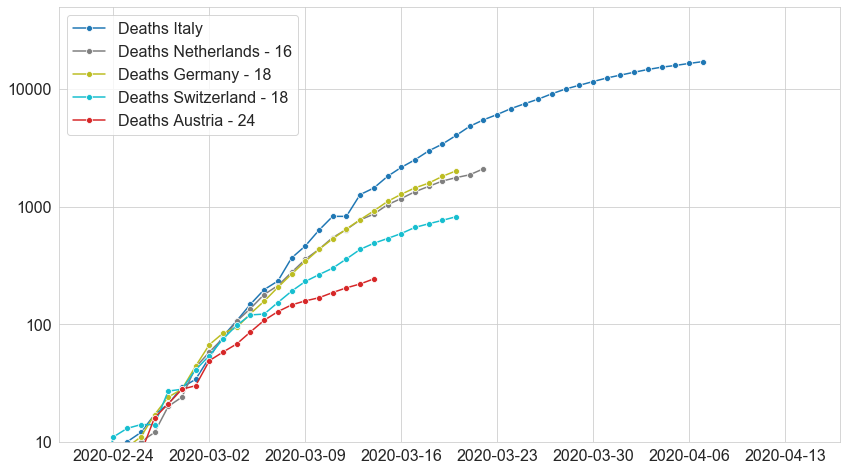

In [11]:
_, ax = plt.subplots(subplot_kw={'yscale': 'log', 'ylim': (10, 50000), 'xlim': XLIM}, figsize=(14, 8))
covid19.plot.plot_data(ax, country_data['Italy']['deaths'], label=f'Deaths Italy', color=PALETTE_ONE[0], kind='line', marker='o')
for (country, delay), color in zip(PARAMS.items(), itertools.cycle(PALETTE_ONE[1:])):
    if country not in ['Germany', 'Switzerland', 'Austria', 'Netherlands']:
        continue
    covid19.plot.plot_data(ax, country_data[country]['deaths'], label=f'Deaths {country} - {delay}', delay=delay, color=color, kind='line', marker='o')
